In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
def sigmoid(x, x0, k):
    return 1 / (1 + np.exp(-k*(x-x0)))
def reverse_sigmoid(y, x0, k):
    return x0 - np.log(1/y - 1) / k

In [19]:
np.log(1/0.05 - 1) /0.1 *2

58.888779583328805

0.10000132384072957


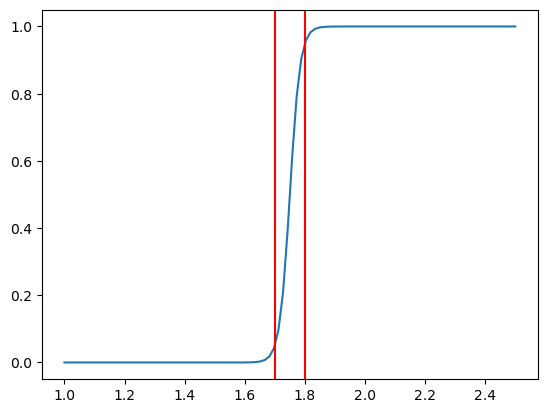

In [20]:
x=np.linspace(1,2.5,100)
x0=1.75
k=58.888
y=sigmoid(x,x0,k)
x1=reverse_sigmoid(0.05,x0,k)
x2=reverse_sigmoid(0.95,x0,k)
dx=np.abs(x2-x1)
print(dx)
plt.plot(x,y)
plt.axvline(x=x1, color='r')
plt.axvline(x=x2, color='r')
plt.show()

In [22]:
import numpy as np
from scipy.stats import norm

# Sigmoid function
def sigmoid(x, a, b):
    return 1 / (1 + np.exp(-(x - a) / b))

# Prior distribution (Gaussian)
def prior_distribution(x, mean, std):
    return norm.pdf(x, mean, std)

def update_posterior(prior, contrast, response, a_range, b):
    likelihood = sigmoid(contrast, a_range, b) if response == 1 else 1 - sigmoid(contrast, a_range, b)
    posterior = prior * likelihood
    posterior /= np.sum(posterior)  # Normalize
    return posterior

In [23]:
class ZESTIterator:
    def __init__(self, mean, std, b, a_range):
        self.a_range = a_range
        self.prior = prior_distribution(a_range, mean, std)
        self.b = b

    def __call__(self, x, r):
        for contrast, response in zip(x, r):
            self.prior = update_posterior(self.prior, contrast, response, self.a_range, self.b)
        
        # Estimate threshold as the mean of the posterior distribution
        threshold_est = np.sum(self.a_range * self.prior)
        
        # Estimate error as the standard deviation of the posterior distribution
        err = np.sqrt(np.sum((self.a_range - threshold_est) ** 2 * self.prior))
        
        # Suggest next contrast level (e.g., mean of the posterior distribution)
        x_next = self.a_range[np.argmax(self.prior)]
        
        return threshold_est, err, x_next
    
    

In [37]:
# Example usage
mean = 0.5  # Initial guess for the threshold
std = 0.1   # Standard deviation of the prior
b = 0.1     # Slope of the sigmoid function
a_range = np.linspace(-1, 1, 100)  # Range of possible threshold values

zest = ZESTIterator(mean, std, b, a_range)

# Simulate some test data
x = np.linspace(-1, 1, 50)
# r = if x < 0 else 1
r = np.where(x < 0, 0, 1)

threshold_est, err, x_next = zest(x, r)
print(f"Estimated contrast threshold: {threshold_est}")
print(f"Estimated error: {err}")
print(f"Suggested next contrast level: {x_next}")

Estimated contrast threshold: 0.14493968442790564
Estimated error: 0.053841841769583065
Suggested next contrast level: 0.1515151515151516


In [35]:
r 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])